In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_data_complete = pd.merge(clinical_data, mouse_drug_data, how = "left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
clinical_data_complete.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)
# Preview DataFrame
tumor_vols_mean

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
# Preview DataFrame
tumor_vols_sem.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


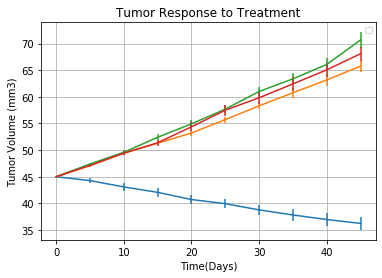

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"])
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"])
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"])
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"])


plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time(Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure



In [9]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)
# Preview DataFrame
met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)
# Preview DataFrame
met_sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [14]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint" , columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index= "Timepoint" , columns="Drug")["Metastatic Sites"]


# Preview that Reformatting worked
tumor_vols_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


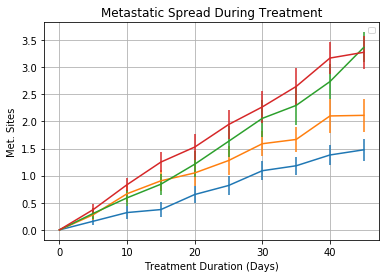

In [15]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"])
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"])
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"])
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"])

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure

# Show the Figure
plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [17]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint" , columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


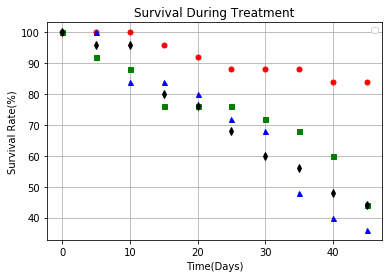

In [19]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0)
plt.plot(100 * survival_count_pivot["Placebo"] / 25, "kd", linestyle="dashed", markersize=5, linewidth=0)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate(%)")
plt.xlabel("Time(Days)")
plt.grid(True)

plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
tumor_pct_change = 100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0]) / tumor_vols_pivot_mean
tumor_pct_change_sem = 100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0]) / tumor_vols_pivot_sem

# Display the data to confirm
tumor_pct_change

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,-19.475303,42.516492,46.123472,57.028795,53.923347,51.297960,47.241175,-22.320900,52.085134,46.579751
5,-19.798195,41.142293,44.102592,54.153629,51.853695,48.984177,44.992579,-22.856838,49.315311,44.738686
10,-20.341257,39.623841,42.011984,51.758336,49.832426,46.706854,43.295034,-23.616137,47.384733,43.049782
15,-20.834490,38.192998,40.462028,48.975134,47.641995,44.945869,41.628441,-24.206267,45.485308,41.278606
20,-21.524256,36.682331,39.015908,46.727095,45.234260,42.461749,39.849726,-24.962285,43.350175,39.422148
25,-21.942889,35.242662,37.252927,44.492737,42.772192,40.158401,38.300800,-25.771868,41.730333,37.813058
30,-22.605199,33.701927,35.601676,42.074211,40.741616,38.596295,36.528957,-25.952432,39.176982,36.318845
35,-23.174560,32.522895,34.169775,40.495936,38.710174,36.981504,35.225283,-26.819412,37.536912,34.882854
40,-23.713096,31.125877,32.860409,38.842908,36.989676,35.485216,33.719324,-27.463179,35.862311,33.315305


AttributeError: module 'numpy' has no attribute 'arrange'

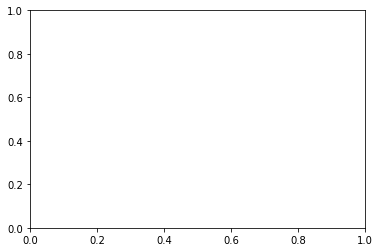

In [26]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"],
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arrange(len(pct_changes))
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[0], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change over 45 day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8, 
           '%d%%' % int(height),
            ha = 'center', va = 'bottom', color = 'white')

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3, 
           '%d%%' % int(height),
            ha = 'center', va = 'bottom', color = 'white')

   
    
# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)